In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

Honest up front note: The best way to learn python/pandas etc. is to work on a problem and google your way through as you encounter things you want to do but don't know how. Hopefully these notebooks will help as a resource / reference for things that arise a lot.

I will use jupyter notebooks for our work and class demos. I use the Python package manager Anaconda installed on my local machine to run notebooks and install necessary packages. Another option is Google CoLab if you prefer.

### Quick review of data manipulation and plotting. 

In [2]:
mar=pd.read_csv('marathon_results_2015.csv')
mar.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


We can check out the data lots of ways:

In [3]:
mar.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [4]:
mar.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

In [5]:
mar.dtypes

Unnamed: 0        int64
Bib              object
Name             object
Age               int64
M/F              object
City             object
State            object
Country          object
Citizen          object
Unnamed: 9       object
5K               object
10K              object
15K              object
20K              object
Half             object
25K              object
30K              object
35K              object
40K              object
Pace             object
Proj Time        object
Official Time    object
Overall           int64
Gender            int64
Division          int64
dtype: object

In [6]:
mar.describe().round(2)

,Unnamed: 0,Age,Overall,Gender,Division
count,26598.00,26598.00,26598.00,26598.00,26598.00
mean,13298.50,42.14,13299.50,6711.79,1654.04
std,7678.33,11.29,7678.33,3944.25,1477.11
min,0.00,18.00,1.00,1.00,1.00
25%,6649.25,33.00,6650.25,3325.25,518.00
50%,13298.50,42.00,13299.50,6650.00,1205.00
75%,19947.75,50.00,19948.75,9974.75,2268.00
max,26597.00,82.00,26598.00,14581.00,6004.00


We can look at one column:

In [7]:
mar['Age'][0:10]

0    25
1    30
2    29
3    28
4    32
5    30
6    32
7    39
8    27
9    33
Name: Age, dtype: int64

Or one entry in a row, column:

In [8]:
mar.loc[2,'Age']

29

Or a picture of the data in a column:

<AxesSubplot:>

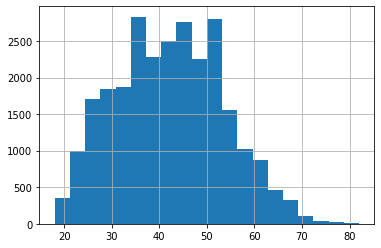

In [9]:
mar['Age'].hist(bins=20)

Or look at several columns using a list:

In [10]:
mar[['Name','Age','M/F']].head()

,Name,Age,M/F
0,"Desisa, Lelisa",25,M
1,"Tsegay, Yemane Adhane",30,M
2,"Chebet, Wilson",29,M
3,"Kipyego, Bernard",28,M
4,"Korir, Wesley",32,M


Or variations on the theme:

In [11]:
mar.loc[4,['Name','Age','M/F']]

Name    Korir, Wesley
Age                32
M/F                 M
Name: 4, dtype: object

In [12]:
mar['Age'].max()

82

Let's clean up a bit...

Two columns were unnamed: 

In [13]:
mar[['Unnamed: 0','Unnamed: 9']].head()

,Unnamed: 0,Unnamed: 9
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


First let's check the Unnamed 0 column and see if it's equal to the row number. The row number is called the index of the data frame, although the index can be set to other values too. 

In [14]:
len(mar)==((mar['Unnamed: 0']==mar.index)).sum()

True

Safe to delete ```Unnamed:0```

In [15]:
del mar['Unnamed: 0']

What about ```Unnamed: 9```?

In [16]:
print(sum(mar['Unnamed: 9'].isnull()),len(mar))

26531 26598


Huh. That's not equal to the number of rows so maybe there is some data in there. Let's check by selecting all rows of the data frame where the 'Unnamed: 9 column' is not null.

In [17]:
mar[mar['Unnamed: 9'].notnull()].head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
1669,3207,"Balcom, Donald C.",41,M,Hollywood,MD,USA,NaN,VI,0:21:23,...,1:44:29,2:05:28,2:26:50,2:47:02,0:06:43,-,2:55:45,1670,1582,204
2251,3310,"Bryant, Andrew V.",33,M,Woodinville,WA,USA,NaN,MI,0:21:05,...,1:45:20,2:06:35,2:28:02,2:48:52,0:06:49,-,2:58:31,2252,2129,1606
5476,6938,"Oliver, Matthew",26,M,Santee,CA,USA,NaN,VI,0:22:30,...,1:52:26,2:15:49,2:39:54,3:03:40,0:07:24,-,3:13:43,5477,4877,2968
6327,12403,"Brand, Thomas R.",31,M,Andover,MA,USA,NaN,VI,0:22:53,...,1:54:21,2:18:24,2:43:04,3:07:13,0:07:32,-,3:17:21,6328,5492,3132
7303,10099,"Hunter, Richard E.",47,M,Folsom,CA,USA,NaN,VI,0:23:24,...,1:56:07,2:20:14,2:45:00,3:09:59,0:07:41,-,3:21:12,7304,6129,1007


What does it mean? Not sure! May or may not be useful.

Selecting subsets of the data frame this way can be very convenient. For instance, how many people over 75 ran the marathon? 

In [18]:
mar[mar['Age']> 75].shape

(38, 24)

There were 38! Here they are...

In [19]:
mar[(mar['Age']> 75)][['Name','Age','City','Country','Official Time']]

,Name,Age,City,Country,Official Time
11886,"Taivassalo, Keijo K.",76,Thornhill,CAN,3:35:21
18655,"Burgasser, Joseph M",76,St Petersburg,USA,3:58:57
19583,"Gornish, Jerry",77,Bala Cynwyd,USA,4:04:10
19743,"Cerminaro, Anthony J. Sr.",78,Jermyn,USA,4:05:03
19984,"Meyrat, Danilo",78,Muriaux,SUI,4:06:40
21625,"Wilson, Harold",82,Tyler,USA,4:18:00
21976,"Miller, Gerald W",78,Calgary,CAN,4:21:05
22161,"Polidori, Peter J",77,Bingham Farms,USA,4:22:27
22195,"Ichida, Susumu",77,Tokyo,JPN,4:22:41
22267,"Iffrig, William G.",80,Lake Stevens,USA,4:23:13


Over 75 and from the US?

In [20]:
mar[(mar['Age']> 75)&(mar['Country']=="USA")][['Name','Age','City','Country','Official Time']]

,Name,Age,City,Country,Official Time
18655,"Burgasser, Joseph M",76,St Petersburg,USA,3:58:57
19583,"Gornish, Jerry",77,Bala Cynwyd,USA,4:04:10
19743,"Cerminaro, Anthony J. Sr.",78,Jermyn,USA,4:05:03
21625,"Wilson, Harold",82,Tyler,USA,4:18:00
22161,"Polidori, Peter J",77,Bingham Farms,USA,4:22:27
22267,"Iffrig, William G.",80,Lake Stevens,USA,4:23:13
22645,"Schleisman, Jim T",81,Jefferson,USA,4:26:49
22996,"Henseler, Hans H",76,Decatur,USA,4:30:35
23883,"Roake, Sam",79,San Francisco,USA,4:41:15
24780,"Phay, Robert E.",76,Chapel Hill,USA,4:57:04


OK, let's say we want to compute each runner's average pace in minutes per mile. We know that a marathon is 26.2 miles and the data here includes each total time, so we have everything we need. Unfortunately, the official time is in a format that is non-numeric. It's a string that combines numbers and symbols but does not allow for numeric operations.

In [21]:
#mar['Official Time'].mean()

In [22]:
mar['Official Time'][0]

'2:09:17'

The format is "hours:minutes:seconds". We can use the convenient split function to split the string on the ":" character to create a list of each value ['h','m','s']. 

In [23]:
mar['Official Time'][0].split(":")

['2', '09', '17']

Let's convert to seconds, then minutes:

In [24]:
60*mar['Official Time'][0].split(":")[1]

'090909090909090909090909090909090909090909090909090909090909090909090909090909090909090909090909090909090909090909090909'

Whoops!

In [25]:
def to_minutes(row):
    x= row['Official Time'].split(":")
    return (int(x[0])*3600+int(x[1])*60+int(x[2]))/60

In [26]:
mar['TimeInMinutes']=mar.apply(to_minutes,axis=1)

In [27]:
mar[['Official Time','TimeInMinutes']].head()

,Official Time,TimeInMinutes
0,2:09:17,129.283333
1,2:09:48,129.800000
2,2:10:22,130.366667
3,2:10:47,130.783333
4,2:10:49,130.816667


Now we can compute a pace:

In [28]:
mar['Pace']=mar['TimeInMinutes']/26.2

In [29]:
mar['Pace'].describe()

count    26598.000000
mean         8.642233
std          1.544616
min          4.934478
25%          7.581425
50%          8.384224
75%          9.405216
max         18.550254
Name: Pace, dtype: float64

<AxesSubplot:>

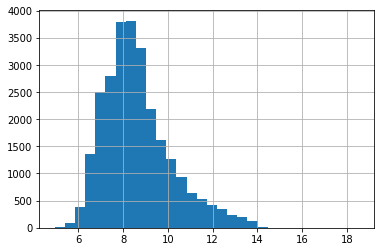

In [30]:
mar['Pace'].hist(bins=30)

In [31]:
fast=mar[(mar['Age']>75)]['Pace'].min()
mar[(mar['Age']>75)&(mar['Pace']==fast)]

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,TimeInMinutes
11886,20278,"Taivassalo, Keijo K.",76,M,Thornhill,ON,CAN,NaN,NaN,0:25:25,...,2:31:34,2:58:15,3:24:16,8.219466,-,3:35:21,11887,8510,1,215.35


Wow, that's 8:13 minutes per mile pace!

What if we wanted to look at the average pace for each US State. First let's check the ```State``` column:

In [32]:
mar.State.isna().sum()

2551

Lot's of missing data. 

In [33]:
mar['State'].describe()

count     24047
unique       69
top          MA
freq       4694
Name: State, dtype: object

Hmm... 50 states but 69 unique values here?

In [34]:
mar['State'].unique()

array([nan, 'MI', 'CA', 'OR', 'CO', 'AZ', 'MO', 'CT', 'QC', 'MA', 'NC',
       'IL', 'NY', 'WA', 'MD', 'NH', 'IA', 'VA', 'PA', 'NJ', 'WI', 'SC',
       'TX', 'OH', 'TN', 'MN', 'FL', 'GA', 'AL', 'HI', 'RI', 'ME', 'OK',
       'UT', 'AB', 'IN', 'DC', 'PE', 'ON', 'KS', 'VT', 'BC', 'ID', 'NE',
       'AK', 'NV', 'KY', 'ND', 'NM', 'AR', 'WV', 'LA', 'NS', 'NB', 'DE',
       'MT', 'SD', 'NL', 'WY', 'MS', 'MB', 'PR', 'NT', 'GU', 'AP', 'SK',
       'AE', 'YT', 'AA', 'VI'], dtype=object)

Aha! These are States in Canada or other places like Guam. We could either leave them in or take them out. I'll leave them in and take all rows where the 'State' column is not null. 

In [35]:
states=mar[mar['State'].notnull()]

Now, we want to split this data frame into groups, one for each state, and take the average over those groups. Python has powerful groupby functionality. Here's an example:

In [36]:
states.groupby('State')[['Age','Pace']].mean().round(2)

,Age,Pace
State,,
AA,35.33,8.24
AB,44.33,8.23
AE,38.33,8.82
AK,44.86,7.99
AL,43.37,8.23
...,...,...
WA,43.86,8.36
WI,41.82,8.27
WV,43.43,8.17


That was what we wanted. This data frame has what's called a multi-index, which is beyond the scope of what we need. It can be avoided as follows:

In [37]:
avg=states[['State','Pace','Age']].groupby('State',as_index=False).mean()
avg

,State,Pace,Age
0,AA,8.236641,35.333333
1,AB,8.230036,44.329787
2,AE,8.821883,38.333333
3,AK,7.994835,44.857143
4,AL,8.234390,43.365385
...,...,...,...
64,WA,8.355855,43.856833
65,WI,8.268105,41.818616
66,WV,8.167413,43.434783
67,WY,8.557252,42.190476


What's the fastest/slowest state?

In [38]:
avg.sort_values(by='Pace')

,State,Pace,Age
43,NT,7.195929,41.000000
5,AP,7.698155,41.500000
53,QC,7.915449,45.262664
3,AK,7.994835,44.857143
12,DC,8.042448,35.837349
...,...,...,...
56,SD,8.894102,42.805556
62,VI,9.051527,50.000000
38,NH,9.081380,42.256560
54,RI,9.175113,40.371622


I'll let you think about why it's probably not fair to say the Massachusetts was the slowest state in the 2015 Boston Marathon!

One last example of merging data frames:

In [39]:
nba_adv=pd.read_csv('NBA2021.csv', sep=",", encoding='cp1252')
nba_adv.head()

,Rk,Player,ID,Pos,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,achiupr01,PF,21,MIA,61,737,14.2,0.550,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
1,2,Jaylen Adams,adamsja01,PG,24,MIL,7,18,-6.5,0.125,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
2,3,Steven Adams,adamsst01,C,27,NOP,58,1605,15.1,0.596,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
3,4,Bam Adebayo,adebaba01,C,23,MIA,64,2143,22.7,0.626,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
4,5,LaMarcus Aldridge,aldrila01,C,35,TOT,26,674,15.7,0.556,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3


In [40]:
nba_adv.columns

Index(['Rk', 'Player', 'ID', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [41]:
nba_raw=pd.read_csv('NBA2021Raw.csv', sep=",", encoding='cp1252')
nba_raw.head()

,Rk,Player,ID,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,achiupr01,PF,21,MIA,61,4,737,124,...,0.509,73,135,208,29,20,28,43,91,304
1,2,Jaylen Adams,adamsja01,PG,24,MIL,7,0,18,1,...,NaN,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,adamsst01,C,27,NOP,58,58,1605,189,...,0.444,213,301,514,111,54,38,78,113,438
3,4,Bam Adebayo,adebaba01,C,23,MIA,64,64,2143,456,...,0.799,142,431,573,346,75,66,169,145,1197
4,5,LaMarcus Aldridge,aldrila01,C,35,TOT,26,23,674,140,...,0.872,19,99,118,49,11,29,27,47,352


In [42]:
nba_raw.columns

Index(['Rk', 'Player', 'ID', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [43]:
print(nba_adv.shape, nba_raw.shape)

(705, 28) (705, 31)


Same number of rows -- one for each player. Let's see what overlap there is among the columns. If we want to merge, we may want to avoid the columns that appear in both (except for the merge keys) since they'll result in duplicate columns. 

In [44]:
set(nba_adv.columns)&set(nba_raw.columns)

{'Age', 'G', 'ID', 'MP', 'Player', 'Pos', 'Rk', 'Tm'}

Let's merge on ```Player``` and ```Tm```. Drop the other common columns from one...

In [45]:
nba_advD=nba_adv.drop(['Age', 'G', 'ID', 'MP', 'Pos', 'Rk',],axis=1)

In [46]:
nba=nba_raw.merge(nba_advD,on=['Player','Tm'])

In [47]:
nba.shape

(705, 51)

In [48]:
nba.columns

Index(['Rk', 'Player', 'ID', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

<AxesSubplot:xlabel='FG%', ylabel='OBPM'>

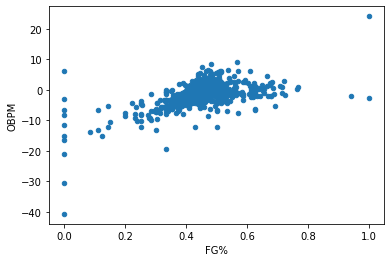

In [49]:
nba.plot.scatter(x='FG%',y='OBPM')

What's up with players whose FG% is 0? Maybe they didn't take many shots.

In [50]:
nba[nba['FG%']==0]['FGA']

49     2
82     1
83     3
127    1
264    4
406    1
507    1
516    1
654    3
679    3
Name: FGA, dtype: int64

Indeed! Maybe some players never took any shots?

In [51]:
nba[nba['FG%'].isna()]

,Rk,Player,ID,Pos,Age,Tm,G,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
126,100,Gary Clark,clarkga01,SF,26,DEN,2,0,4,0,...,0.0,0.037,-4.400,-2.0,-6.5,0.0,NaN,NaN,NaN,NaN
250,195,Ashton Hagans,haganas01,PG,21,MIN,2,0,4,0,...,0.0,0.000,-0.353,-13.7,-7.4,-21.1,0.0,NaN,NaN,NaN


So maybe we drop these players. Small sample size is probably an issue:

<AxesSubplot:>

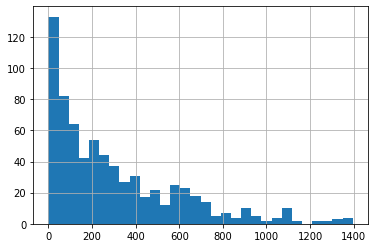

In [52]:
nba['FGA'].hist(bins=30)

<AxesSubplot:xlabel='MP', ylabel='FG%'>

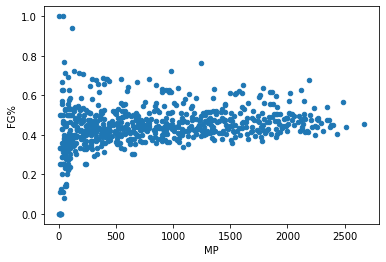

In [53]:
nba.plot.scatter(x='MP',y='FG%')

<AxesSubplot:xlabel='MP', ylabel='FG%'>

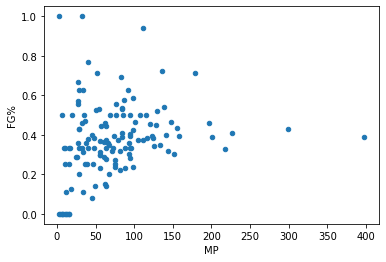

In [54]:
nba[nba['FGA']<50].plot.scatter(x='MP',y='FG%')

<AxesSubplot:xlabel='MP', ylabel='FG%'>

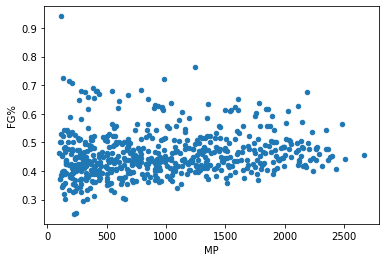

In [55]:
nba[nba['MP']>=100].plot.scatter(x='MP',y='FG%')

# ML Overview

The basic problem:


$$
Y=f(X)+\epsilon
$$


$Y$ is the response, $X$ is a set of features, $f$ is the relationship between $X$ and $Y$. 

$\epsilon$ is the random error: independent of $X$ with mean $0$.

Our job: Estimate $Y$ with a model $\hat{f}$:

$$\hat{Y} = \hat{f}(X)$$

## Two types of problems: Regression and Classification

**Regression**: Predict a quantitative response $Y$ using inputs $X_1,\ldots X_p$. Inputs, or features, or predictors, can typically be quantitative or categorical. 

*Example*: predict rent given neighborhood, square footage, number of bathrooms, type of buildiong etc. (Quantitative response: salary, stock price, weight, etc.)

**Classification** is trying to predict a class label (to which group does an observation belong) from inputs. 

*Example*: is this an image of a face, or a cat; what customer profile does an individual belong to, is this MRI image pathological or normal, is this player a guard, forward, or center (given statistics). 

## Start with regression. 

We typically have to guard against two problems: *Overfitting* and *Underfitting*.

Let's generate data according to a simple linear relationship:

In [56]:
np.random.seed(1)
df=pd.DataFrame()
df['x'] = np.linspace(0,10,num=7)
df['y'] = df['x'] + np.random.normal(0,2,size=7)

$$
y=x+\epsilon
$$
where $\epsilon \sim N(0,4)$: variance = 4, standard deviation  = 2

In [57]:
df

,x,y
0,0.000000,3.248691
1,1.666667,0.443154
2,3.333333,2.276990
3,5.000000,2.854063
4,6.666667,8.397482
5,8.333333,3.730256
6,10.000000,13.489624


The true slope is 1, the true intercept is 0.

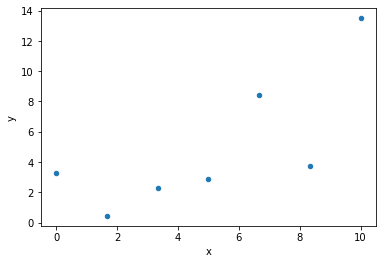

In [58]:
df.plot.scatter(x='x',y='y');

Let's build some models:

In [59]:
mod1=ols(formula='y~x',data=df).fit()
mod2=ols(formula='y~x+np.power(x,2)+np.power(x,3)+np.power(x,4)+np.power(x,5)+np.power(x,6)',data=df).fit()
mod3=df['y'].mean()

Now we have three models. The first is a linear regression model that assumes that $Y$ is a linear function of $X$, and that the error follows a normal distribution which has mean 0 and fixed, constant variance no matter the value of $X$. (Both assumptions here are, in fact, true!) 

The second model is much more flexible. It assumes that $Y$ is a degree 6 polynomial in $X$, and fits parameters so that:
$$
y=\hat{\beta_0}+\hat{\beta}_1x+\hat{\beta}_2x^2+\hat{\beta}_3x^3+\hat{\beta}_4x^4+\hat{\beta}_5x_5+\hat{\beta}_6x^6
$$

The third model just predicts the average value of the $y$'s.

In [60]:
df['ymod1']=mod1.predict(df['x'])
df['ymod2']=mod2.predict(df['x'])
df['ymod3']=df['y'].mean()

In [61]:
df

,x,y,ymod1,ymod2,ymod3
0,0.000000,3.248691,0.268163,3.248691,4.920037
1,1.666667,0.443154,1.818787,0.443154,4.920037
2,3.333333,2.276990,3.369412,2.276990,4.920037
3,5.000000,2.854063,4.920037,2.854063,4.920037
4,6.666667,8.397482,6.470662,8.397482,4.920037
5,8.333333,3.730256,8.021287,3.730256,4.920037
6,10.000000,13.489624,9.571911,13.489624,4.920037


Which is best?

In [62]:
b0,b1=mod1.params
a0,a1,a2,a3,a4,a5,a6=mod2.params

In [63]:
print(b0,b1) # The intercept and slope of the linear model

0.268162502761097 0.9303748864337469


In order to plot the polynomial model and have it appear smooth we can use more $x$ values and use the model to predict the corresponding $y$:  

In [64]:
morex=np.linspace(0,10,num=100) 

Plot them all together with some matplotlib code:

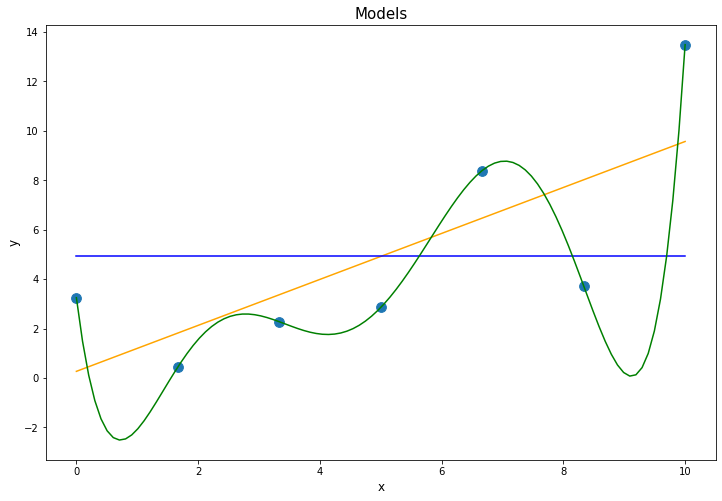

In [65]:
fig, ax = plt.subplots()
plt.scatter(df['x'], df['y'], s=95)
plt.plot(df['x'], df['x']*b1 + b0, c='orange')
plt.plot(df['x'], df['ymod3'], c='blue')
plt.plot(morex, np.power(morex,6)*a6+np.power(morex,5)*a5+np.power(morex,4)*a4+np.power(morex,3)*a3+np.power(morex,2)*a2+morex*a1 + a0, c='green')
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Models",fontsize=15)
fig.set_size_inches(12, 8)
plt.show();

At first glance we might think it's the polynomial model which literally goes through every point exactly. However, we know that's because a degree 6 polynomial can go through any 7 points. If we use new inputs the polynomial model will do poorly predicting the corresponding $Y$ values.

In [66]:
np.random.seed(1)
morey=morex+np.random.normal(0,2,size=100)

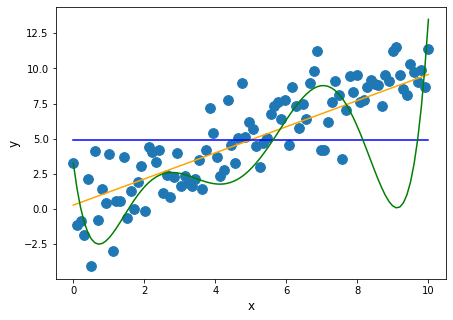

In [67]:
fig, ax = plt.subplots()
plt.scatter(morex, morey, s=95)
plt.plot(df['x'], df['x']*b1 + b0, c='orange')
plt.plot(df['x'], df['ymod3'], c='blue')
plt.plot(morex, np.power(morex,6)*a6+np.power(morex,5)*a5+np.power(morex,4)*a4+np.power(morex,3)*a3+np.power(morex,2)*a2+morex*a1 + a0, c='green')
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
fig.set_size_inches(7, 5)
plt.show()

The linear model is now clearly better!

This polynomial model is an example of **overfitting**: A highly flexible model (like this one) will overfit the training data but then generalize poorly to new data that the model hasn't seen before. (Emphasizing the importance of the test set in modeling!)

By contrast, the constant (mean) model is **underfitting**-- it's not flexible enough to reflect the true relationship between $x$ and $y$.

This is also an example of the bias variance tradeoff. 

**Bias**: If $f$ gives the true relationship between inputs and outputs, and $\hat{f}$ is our model of that relationship, then bias is $f-\hat{f}$. Usually our $\hat{f}$ is just an oversimplified approximation to $f$ (eg. relationship is linear), so the model has some bias.

Note: There is also irreducible bias: represented by the error from the $N(0,4)$ term above... independent of $X$.

A more flexible model has low bias (on the training data) whereas a less flexible model has higher bias. 

**Variance**: But, the more flexible model has high variance: If you fit the model on a new training set it would change *a lot*. The less flexible models, by contrast, have lower vairance: they will not change much given new training data. 

For example, if we generate 6 new points using the same exact underlying process: 

In [68]:
np.random.seed(2)
df2=pd.DataFrame()
df2['x'] = np.linspace(0,10,num=7)
df2['y'] = df2['x'] + np.random.normal(0,2,size=7)

And refit a degree 6 polynomial:

In [69]:
newmod2=ols(formula='y~x+np.power(x,2)+np.power(x,3)+np.power(x,4)+np.power(x,5)+np.power(x,6)',data=df2).fit()

In [70]:
c0,c1,c2,c3,c4,c5,c6=newmod2.params

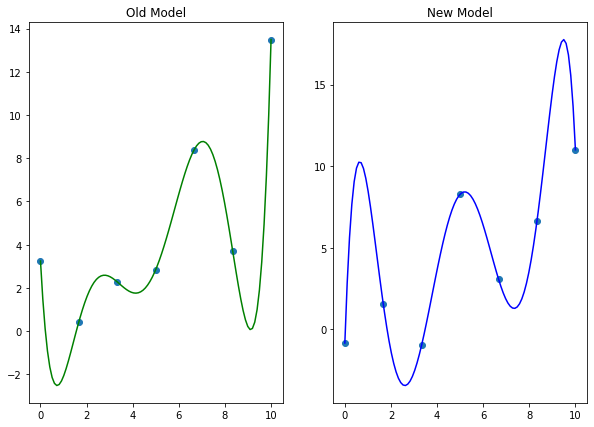

In [71]:
fig, axes = plt.subplots(nrows=1,ncols=2)
axes[0].plot(df['x'], df['y'],'o')
axes[0].plot(morex, np.power(morex,6)*a6+np.power(morex,5)*a5+np.power(morex,4)*a4+np.power(morex,3)*a3+np.power(morex,2)*a2+morex*a1 + a0, c='green')
axes[0].title.set_text('Old Model')
axes[1].plot(df2['x'], df2['y'],'o')
axes[1].plot(morex, np.power(morex,6)*c6+np.power(morex,5)*c5+np.power(morex,4)*c4+np.power(morex,3)*c3+np.power(morex,2)*c2+morex*c1 + c0, c='blue')
axes[1].title.set_text('New Model')
fig.set_size_inches(10, 7)
plt.show()

Much of what we do in ML is trying to fit good models with relatively low bias and relatively low variance that will generalize well to data that was not used in the model building process.

While it may be easy to achieve low bias with an etremely flexible model, the end result may likely be unsatisfactory if it also has high variance and does not generalize well.

One way to help with the problem of overfitting is to have more training data (though this is obviously not always possible). 

In [72]:
bigdf=pd.DataFrame({'x':morex,'y':morey})
#Now fit a degree 6 model to 100 points instead of 7 points:
polymod = ols(formula='y~x+np.power(x,2)+np.power(x,3)+np.power(x,4)+np.power(x,5)+np.power(x,6)',data=bigdf).fit()
bigdf['polymod']=polymod.predict(bigdf['x'])

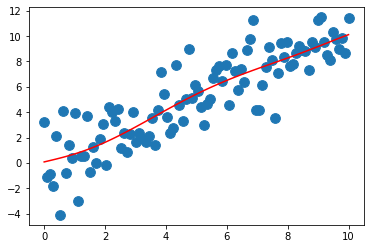

In [73]:
plt.scatter(morex, morey, s=95)
plt.plot(bigdf['x'],bigdf['polymod'],c='red')
plt.show()

Now, even though we're using the flexible degree 6 model, the fit is very close to the linear model. The linear model is still simpler (and better -- if $x^2,\ldots x^6$ have no bearing on $y$ then it's better to not include them in the model), but now the more flexible model will generalize better to new data.

Strategies to prevent overfitting: 
1. Use a less complex model (fewer parameters) 
2. Get more data 
3. Evaluate model performance on test data the model has not seen.

### What is the difference between machine learning and statistical modeling?

Often it's in the assumptions of the model: like $\epsilon \sim N(0,\sigma^2)$, and resulting statistical properties of model parameters (think: t-tests, confidence intervals, etc.) 

Also interpretability: ML is often more concerned with prediction than interpretation (black boxes might be OK). Statistical models often lend themselves more readily to interpretations. 

In [74]:
cars=pd.read_csv('morecars.csv')
cars.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


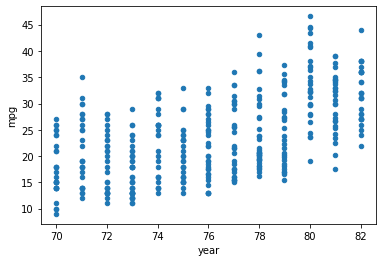

In [75]:
cars.plot.scatter(x='year',y='mpg');

We might be interested in predicting $mpg$ from other features (a regression probelm) or deciding from those features whether or not a car is fuel efficient (defined as gets better than median $mpg$) -- a (two-class) classification problem.

In [76]:
cars['Eff']=np.where(cars['mpg']>=cars['mpg'].median(),1,0)
cars.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Eff
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [77]:
cars.head(20)

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Eff
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


In [78]:
cars.groupby('Eff').mean()['mpg']

Eff
0    16.94264
1    29.99050
Name: mpg, dtype: float64

In [79]:
#cars.groupby('Eff').agg({'mpg':['mean','count','std'],'horsepower':['mean','count','median']})

In [80]:
cars.dtypes

Unnamed: 0        int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
Eff               int64
dtype: object

In [81]:
cars['horsepower'].head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

Looks like a number but isn't.

In [82]:
cars.loc[0,'horsepower']*2

'130130'

In [83]:
cars['horsepower'].describe()

count     397
unique     94
top       150
freq       22
Name: horsepower, dtype: object

In [84]:
cars['horsepower']=pd.to_numeric(cars['horsepower'],errors='coerce')

In [85]:
cars.groupby('Eff').agg({'mpg':['mean','count','std'],'horsepower':['mean','count','median']}).round(2)

mpg             horsepower             
      mean count   std       mean count median
Eff                                           
0    16.94   197  3.15     130.11   196  125.0
1    29.99   200  5.22      78.83   196   76.5

<AxesSubplot:>

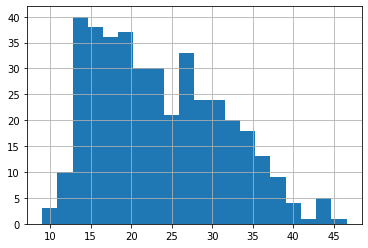

In [86]:
cars['mpg'].hist(bins=20)

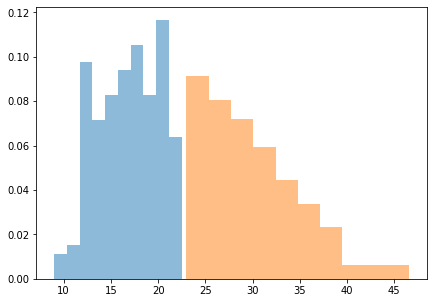

In [87]:
fig, ax = plt.subplots(figsize=(7,5))  # make one subplot (ax) on the figure
ax.hist(cars[cars['Eff']==0]['mpg'],bins=10,alpha=0.5,density=True)
ax.hist(cars[cars['Eff']==1]['mpg'],bins=10,alpha=0.5,density=True)
plt.show()

We can ```statsmodels``` to build regression models. Gives nice ```R``` style summary output:

In [88]:
yr_mod=ols(formula='mpg~year+cylinders',data=cars).fit()
yr_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     490.5
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          1.17e-107
Time:                        12:59:49   Log-Likelihood:                -1131.5
No. Observations:                 397   AIC:                             2269.
Df Residuals:                     394   BIC:                             2281.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.3029      4.935     -3.506      0.001     -27.006      -7.600
year           0.7529      0.061     12.347      0.000       0.633       0.873
cylinders     -3.0040      0.132    -22.718      0.000      -3.264      -2.744
==============================================================================
Omnibus:                       23.562   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.862
Skew:                           0.501   Prob(JB):                     3.28e-07
Kurtosis:                       3.895   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can do the same in ```sklearn``` (where most of our ML models will get built):

In [89]:
from sklearn import linear_model

In ```sklearn``` we always separate out the features ($X$) and the response ($y$)

In [90]:
Xc=cars[['year','cylinders']]
yc=cars['mpg']

In [91]:
car_reg = linear_model.LinearRegression().fit(Xc,yc)

We have to hunt for the info:

In [92]:
car_reg.intercept_

-17.302853429634837

In [93]:
car_reg.coef_

array([ 0.75289359, -3.00404566])

To get R^2:

In [94]:
car_reg.score(Xc, yc).round(3)

0.713

And we don't get $t$-statistics, $p$-values, confidence intervals, diagnostics, etc. Shows the difference in philosophy maybe? 

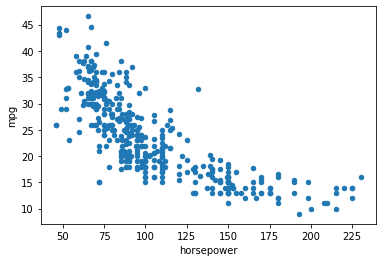

In [95]:
cars.plot.scatter(x='horsepower',y='mpg');

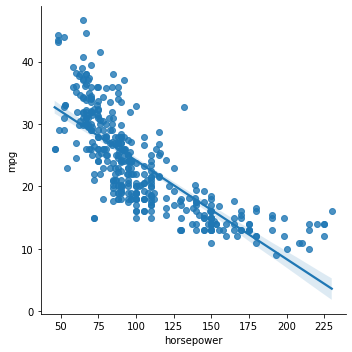

In [96]:
sns.lmplot(x='horsepower',y='mpg',data=cars)

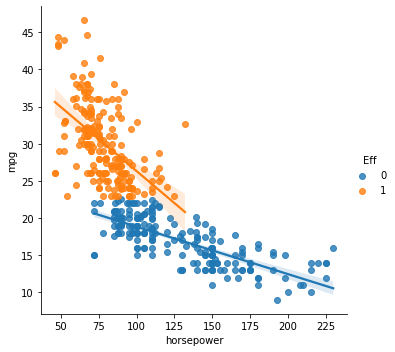

In [97]:
sns.lmplot(x='horsepower',y='mpg',hue='Eff',data=cars)

In [98]:
hp_mod=ols(formula='mpg~horsepower',data=cars).fit()
hp_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           7.03e-81
Time:                        12:59:50   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can build two separate models for each ```Eff``` category using an indicator variable:

In [99]:
hpe_mod=ols(formula='mpg~horsepower+Eff',data=cars).fit()
hpe_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     722.0
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          1.15e-131
Time:                        12:59:50   Log-Likelihood:                -1057.4
No. Observations:                 392   AIC:                             2121.
Df Residuals:                     389   BIC:                             2133.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.3863      0.866     31.613      0.000      25.683      29.090
horsepower    -0.0804      0.006    -12.651      0.000      -0.093      -0.068
Eff            8.9233      0.489     18.257      0.000       7.962       9.884
==============================================================================
Omnibus:                       53.709   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.146
Skew:                           0.835   Prob(JB):                     7.23e-20
Kurtosis:                       4.616   Cond. No.                         586.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
hpey_mod=ols(formula='mpg~horsepower+Eff+year',data=cars).fit()
hpey_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     606.8
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          4.31e-146
Time:                        12:59:50   Log-Likelihood:                -1020.3
No. Observations:                 392   AIC:                             2049.
Df Residuals:                     388   BIC:                             2065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.9498      4.012     -1.981      0.048     -15.839      -0.061
horsepower    -0.0702      0.006    -11.896      0.000      -0.082      -0.059
Eff            8.0012      0.457     17.509      0.000       7.103       8.900
year           0.4571      0.051      8.982      0.000       0.357       0.557
==============================================================================
Omnibus:                       52.852   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.895
Skew:                           0.807   Prob(JB):                     3.02e-20
Kurtosis:                       4.702   Cond. No.                     3.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
hpeq_mod=ols(formula='mpg~horsepower+np.power(horsepower,2)+Eff+year',data=cars).fit()
hpeq_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     559.4
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          2.27e-159
Time:                        12:59:50   Log-Likelihood:                -986.00
No. Observations:                 392   AIC:                             1982.
Df Residuals:                     387   BIC:                             2002.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1962      3.800      0.052      0.959      -7.276       7.668
horsepower                 -0.2786      0.025    -11.230      0.000      -0.327      -0.230
np.power(horsepower, 2)     0.0008   9.16e-05      8.607      0.000       0.001       0.001
Eff                         6.4592      0.456     14.169      0.000       5.563       7.355
year                        0.5181      0.047     10.973      0.000       0.425       0.611
==============================================================================
Omnibus:                       31.969   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.320
Skew:                           0.504   Prob(JB):                     3.57e-13
Kurtosis:                       4.579   Cond. No.                     3.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Another example:

In [102]:
bfat=pd.read_csv('Bodyfat.csv').drop('Density',axis=1)
bfat.head()

,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [103]:
bfat.shape

(252, 14)

In [104]:
bfat[['bodyfat','Age','Weight','Hip','Ankle','Wrist']].corr().round(2)

,bodyfat,Age,Weight,Hip,Ankle,Wrist
bodyfat,1.00,0.29,0.61,0.63,0.27,0.35
Age,0.29,1.00,-0.01,-0.05,-0.11,0.21
Weight,0.61,-0.01,1.00,0.94,0.61,0.73
Hip,0.63,-0.05,0.94,1.00,0.56,0.63
Ankle,0.27,-0.11,0.61,0.56,1.00,0.57
Wrist,0.35,0.21,0.73,0.63,0.57,1.00


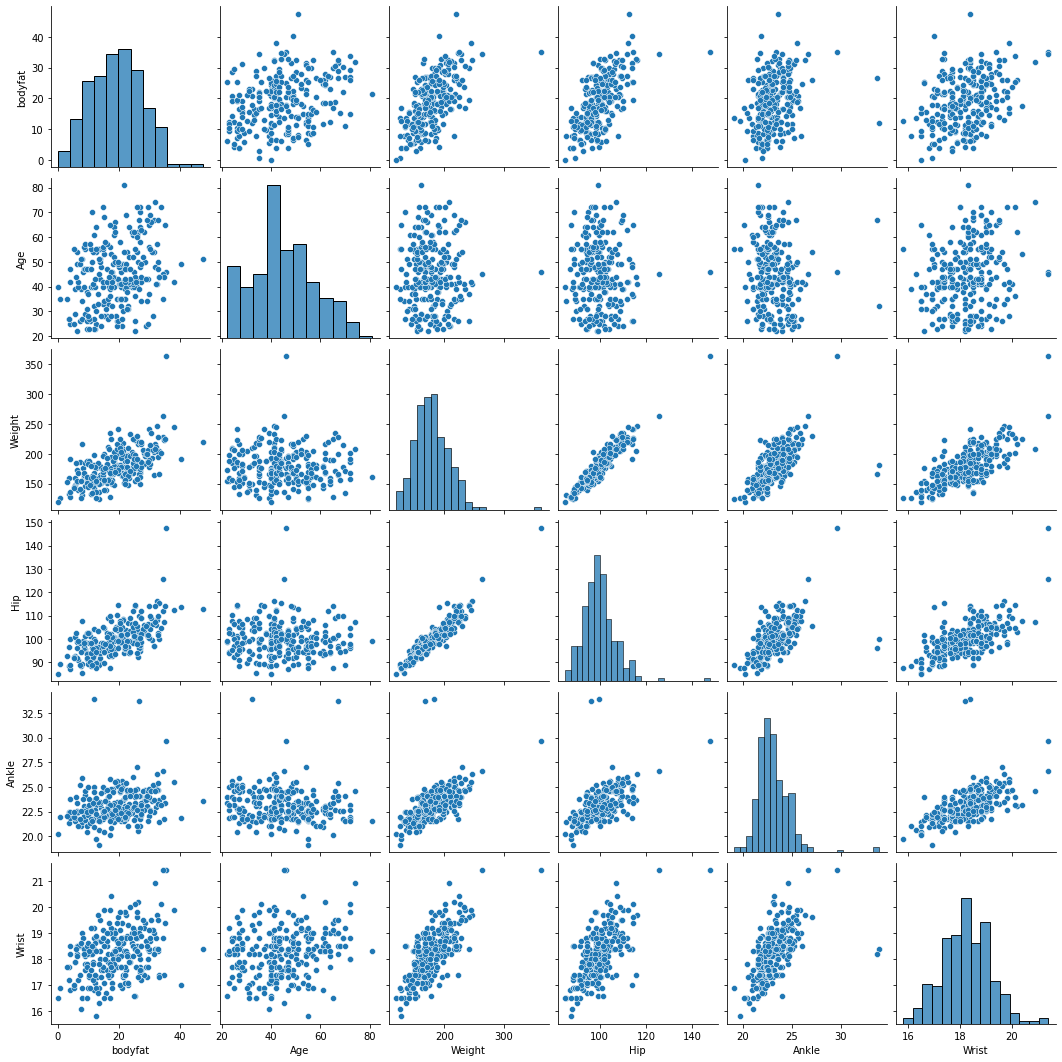

In [105]:
sns.pairplot(bfat[['bodyfat','Age','Weight','Hip','Ankle','Wrist']])

In [106]:
hip_mod=ols(formula='bodyfat~Hip',data=bfat).fit()
hip_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     160.4
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           9.82e-29
Time:                        12:59:54   Log-Likelihood:                -829.98
No. Observations:                 252   AIC:                             1664.
Df Residuals:                     250   BIC:                             1671.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.8129      5.775     -9.318      0.000     -65.187     -42.438
Hip            0.7303      0.058     12.666      0.000       0.617       0.844
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.601
Skew:                          -0.076   Prob(JB):                        0.740
Kurtosis:                       2.815   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
ha_mod=ols(formula='bodyfat~Hip+Age',data=bfat).fit()
ha_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     122.2
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.03e-37
Time:                        12:59:54   Log-Likelihood:                -806.26
No. Observations:                 252   AIC:                             1619.
Df Residuals:                     249   BIC:                             1629.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.3645      5.507    -11.869      0.000     -76.211     -54.518
Hip            0.7494      0.053     14.232      0.000       0.646       0.853
Age            0.2150      0.030      7.183      0.000       0.156       0.274
==============================================================================
Omnibus:                        0.092   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.087
Skew:                          -0.043   Prob(JB):                        0.958
Kurtosis:                       2.968   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
a_mod=ols(formula='bodyfat~Age',data=bfat).fit()
a_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     23.21
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           2.52e-06
Time:                        12:59:54   Log-Likelihood:                -881.26
No. Observations:                 252   AIC:                             1767.
Df Residuals:                     250   BIC:                             1774.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4633      1.873      5.587      0.000       6.775      14.152
Age            0.1936      0.040      4.818      0.000       0.114       0.273
==============================================================================
Omnibus:                        1.611   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.682
Skew:                           0.156   Prob(JB):                        0.431
Kurtosis:                       2.750   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
bfat[['Hip','Age']].corr()

,Hip,Age
Hip,1.000000,-0.050332
Age,-0.050332,1.000000


In [110]:
preds="+".join(bfat.columns[i] for i in range(1,len(bfat.columns))) 
preds

'Age+Weight+Height+Neck+Chest+Abdomen+Hip+Thigh+Knee+Ankle+Biceps+Forearm+Wrist'

In [111]:
bfat_mod=ols(formula='bodyfat~' + preds,data=bfat).fit()

In [112]:
bfat_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           7.72e-64
Time:                        12:59:54   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.296     -52.365      15.988
Age            0.0621      0.032      1.919      0.056      -0.002       0.126
Weight        -0.0884      0.054     -1.652      0.100      -0.194       0.017
Height        -0.0696      0.096     -0.725      0.469      -0.259       0.120
Neck          -0.4706      0.232     -2.024      0.044      -0.929      -0.013
Chest         -0.0239      0.099     -0.241      0.810      -0.219       0.171
Abdomen        0.9548      0.086     11.044      0.000       0.784       1.125
Hip           -0.2075      0.146     -1.422      0.156      -0.495       0.080
Thigh          0.2361      0.144      1.636      0.103      -0.048       0.520
Knee           0.0153      0.242      0.063      0.950      -0.461       0.492
Ankle          0.1740      0.221      0.786      0.433      -0.262       0.610
Biceps         0.1816      0.171      1.061      0.290      -0.156       0.519
Forearm        0.4520      0.199      2.270      0.024       0.060       0.844
Wrist         -1.6206      0.535     -3.030      0.003      -2.674      -0.567
==============================================================================
Omnibus:                        4.404   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                2.820
Skew:                          -0.012   Prob(JB):                        0.244
Kurtosis:                       2.482   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
bfat_mod2=ols(formula='bodyfat~Age+Weight+Neck+Chest+Hip+Wrist' ,data=bfat).fit()
bfat_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     60.32
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.52e-45
Time:                        12:59:54   Log-Likelihood:                -778.15
No. Observations:                 252   AIC:                             1570.
Df Residuals:                     245   BIC:                             1595.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.6354     15.507     -2.427      0.016     -68.179      -7.092
Age            0.1877      0.032      5.919      0.000       0.125       0.250
Weight        -0.0031      0.053     -0.058      0.954      -0.107       0.101
Neck          -0.1863      0.278     -0.671      0.503      -0.733       0.361
Chest          0.5513      0.101      5.458      0.000       0.352       0.750
Hip            0.4824      0.147      3.286      0.001       0.193       0.772
Wrist         -2.6219      0.610     -4.297      0.000      -3.824      -1.420
==============================================================================
Omnibus:                        0.957   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                1.044
Skew:                           0.089   Prob(JB):                        0.593
Kurtosis:                       2.740   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Recall that the OLS model minimizes:
$$
\sum (y-\hat{y})^2
$$
where
$$
\hat{y} = \beta_0+\beta_1x_1+\cdots \beta_px_p
$$
(sum over all observations $(x_{i1},x_{i2},\ldots,x_{ip},y_i))$

This is the **loss function**: we think of this as a function of the parameters (the $\beta$'s) and find the minimum. This is a calculus problem and is typically solved using (a flavor of) gradient descent. 

In general, linear regression is a relatively low-variance method. The linear model isn't particularly sensitive to changes in the training data as long as the number of observations is large relative to the number of predictors $n>p$ and the predictors are themselves not highly correlated. 

As we've seen, though, when we have many highly correlated predictors the model OLS model has considerably higher variance. One way to reduce the variance is to introduce a penalty into the loss function so that the model prefers smaller values of the coeficients. This is known as shrinkage or penalized regression. The two most widely used versions are *ridge regression* and *lasso regression*.  

**Ridge**: Minimize
$$
\sum\left(y-\hat{y}\right)^2+\lambda\left(\sum_{i=1}^p\beta_i^2\right)
$$

$$
=RSS+\lambda\|\bf{\beta}\|_2^2
$$

Here, $\lambda$ is a parameter that controls the size of the penalty. The larger $\lambda$ is, the more we shrink the $\beta$'s to compensate. Smaller $\lambda$ means we pay more attention to $RSS$, and when $\lambda=0$ we're back at the OLS model.  

Note: This is an example of the so-called bias-variance tradeoff. As we've seen above, Often models with low bias have high variance. Here, we are intoducing some bias (the penalty means we're no longer taking the best least-squares fit) in exchange for lower variance which can lead to better performance on a test set (or new data).  

### Cross Validation

We have several issues to deal with when building a model. First, we need to train the model on part of our data and test it on new data that wasn't used in training. At the same time, the more data we use to build the model, the better (usually) so it hurts to give up too much of our data to the test set. Furthermore, we need a way to choose the value of parameter(s) like $\lambda$. 

Typical data science workflow: Split the data into a training set and a test set. We decide on how big the test set is based on how much data we have and how much we think we need to train well: 20%, 30%, 40%?

``` scikit-learn ``` has a module to make this easy.

Next, split the *training set* into $k$ equal sized folds. Usually $k=5$ or $k=10$.

Next: Put aside fold 1. For each $\lambda$, train the model on folds 2 through $k$. Test it on fold 1 to get a test-set error estimate.

For regression, this would be MSE (mean squared error): $MSE_1$

Repeat using each fold as the test set and the remaining folds for training. Finally, consider:
$$
CV_k = \frac{1}{k}\sum_{i=1}^k MSE_i
$$

<img src="FFCV_ISLR.png">

##### (from ISLR by James, Witten, Hastie, Tibshirani)

### We can use Cross Validation to choose the model, or, to tune the parameters in a given model (The $\lambda$ in Ridge regression, for instance).  

First we do an example of choosing the model. Note this is similar to the thought process used above but is more mechanical...

In [114]:
from sklearn.model_selection import cross_validate

In [115]:
cars.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Eff
0,0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


Let's drop the na values though we might reasonably impute missing horsepower here -- maybe average hp for similar weight/cyl cars?

In [116]:
cars=cars.dropna()

In [117]:
#try without the copy for warnings 
X=cars[['horsepower']].copy()
y=cars[['mpg']]

In [118]:
X['hp2']=X['horsepower']**2
X['hp3']=X['horsepower']**3
X['hp4']=X['horsepower']**4

We'll try fitting models of degree 1,2,3 and 4, and choose using cross-validation. 

In [119]:
reg = linear_model.LinearRegression()
cv1_results = cross_validate(reg, X[['horsepower']], y, cv=5,scoring='neg_mean_squared_error')
cv2_results = cross_validate(reg, X[['horsepower','hp2']], y, cv=5,scoring='neg_mean_squared_error')
cv3_results = cross_validate(reg, X[['horsepower','hp2','hp3']], y, cv=5,scoring='neg_mean_squared_error')
cv4_results = cross_validate(reg, X[['horsepower','hp2','hp3','hp4']], y, cv=5,scoring='neg_mean_squared_error')

Let's look at the test-set error for the quadratic model:

In [120]:
cv2_results['test_score']

array([-15.63062509, -22.34446046, -13.08739435, -16.79334098,
       -53.87997335])

So this shows the (negative) mean squared error on each of the five folds (being used as the test set).

In [121]:
-cv2_results['test_score'].round(3)

array([15.631, 22.344, 13.087, 16.793, 53.88 ])

In [122]:
-cv2_results['test_score'].mean().round(3)

24.347

In [123]:
print(-cv1_results['test_score'].mean().round(3),-cv2_results['test_score'].mean().round(3).round(3),-cv3_results['test_score'].mean().round(3),-cv4_results['test_score'].mean().round(3))

31.447 24.347 24.346 24.355


Cross validaiton chooses the quadratic model.It has considerably lower avg MSE than the linear model, and higher order models do not improve.

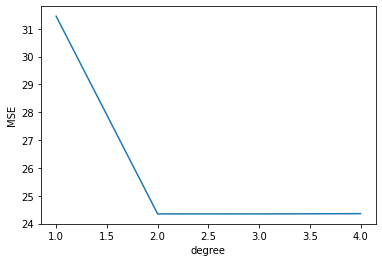

In [124]:
cvs=[-cv1_results['test_score'].mean(),-cv2_results['test_score'].mean(),-cv3_results['test_score'].mean(),-cv4_results['test_score'].mean()]
degs=[1,2,3,4]
plt.plot(degs,cvs)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

Finally, refit the model on the combined training data (all folds).

In [125]:
hpreg = linear_model.LinearRegression().fit(X[['horsepower','hp2']],y)

In [126]:
hpreg.score(X[['horsepower','hp2']], y)

0.6875590305127517

In [127]:
print(hpreg.intercept_,hpreg.coef_)

[56.9000997] [[-0.46618963  0.00123054]]


By the way, the same model we'd get in statmodels...

In [128]:
hpq_mod=ols(formula='mpg~horsepower+np.power(horsepower,2)',data=cars).fit()
hpq_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           5.40e-99
Time:                        12:59:54   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  56.9001      1.800     31.604      0.000      53.360      60.440
horsepower                 -0.4662      0.031    -14.978      0.000      -0.527      -0.405
np.power(horsepower, 2)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note**: By using the test folds to choose the model degree, however, we've used that data to tune the model. Thus, we still need a test set to see how it does on unseen data.

In [129]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split

### Choosing a parameter

For ridge regression we need to use cross validation to choose the optimal $\lambda$. We try a whole array of values from very large to very small.

Let's take 100 evenly spaced values between -3 and 5... 

In [130]:
np.linspace(5,-3,100)

array([ 5.        ,  4.91919192,  4.83838384,  4.75757576,  4.67676768,
        4.5959596 ,  4.51515152,  4.43434343,  4.35353535,  4.27272727,
        4.19191919,  4.11111111,  4.03030303,  3.94949495,  3.86868687,
        3.78787879,  3.70707071,  3.62626263,  3.54545455,  3.46464646,
        3.38383838,  3.3030303 ,  3.22222222,  3.14141414,  3.06060606,
        2.97979798,  2.8989899 ,  2.81818182,  2.73737374,  2.65656566,
        2.57575758,  2.49494949,  2.41414141,  2.33333333,  2.25252525,
        2.17171717,  2.09090909,  2.01010101,  1.92929293,  1.84848485,
        1.76767677,  1.68686869,  1.60606061,  1.52525253,  1.44444444,
        1.36363636,  1.28282828,  1.2020202 ,  1.12121212,  1.04040404,
        0.95959596,  0.87878788,  0.7979798 ,  0.71717172,  0.63636364,
        0.55555556,  0.47474747,  0.39393939,  0.31313131,  0.23232323,
        0.15151515,  0.07070707, -0.01010101, -0.09090909, -0.17171717,
       -0.25252525, -0.33333333, -0.41414141, -0.49494949, -0.57

...and then use them as exponents of 10 for the $\lambda$ values. So, $10^5$ is very big (close to the null model where all $\beta$s are 0) and $10^{-3}$ is very small (close to OLS).

In [131]:
lambdas = 10**np.linspace(5,-3,100)
lambdas

array([1.00000000e+05, 8.30217568e+04, 6.89261210e+04, 5.72236766e+04,
       4.75081016e+04, 3.94420606e+04, 3.27454916e+04, 2.71858824e+04,
       2.25701972e+04, 1.87381742e+04, 1.55567614e+04, 1.29154967e+04,
       1.07226722e+04, 8.90215085e+03, 7.39072203e+03, 6.13590727e+03,
       5.09413801e+03, 4.22924287e+03, 3.51119173e+03, 2.91505306e+03,
       2.42012826e+03, 2.00923300e+03, 1.66810054e+03, 1.38488637e+03,
       1.14975700e+03, 9.54548457e+02, 7.92482898e+02, 6.57933225e+02,
       5.46227722e+02, 4.53487851e+02, 3.76493581e+02, 3.12571585e+02,
       2.59502421e+02, 2.15443469e+02, 1.78864953e+02, 1.48496826e+02,
       1.23284674e+02, 1.02353102e+02, 8.49753436e+01, 7.05480231e+01,
       5.85702082e+01, 4.86260158e+01, 4.03701726e+01, 3.35160265e+01,
       2.78255940e+01, 2.31012970e+01, 1.91791026e+01, 1.59228279e+01,
       1.32194115e+01, 1.09749877e+01, 9.11162756e+00, 7.56463328e+00,
       6.28029144e+00, 5.21400829e+00, 4.32876128e+00, 3.59381366e+00,
      

Now split the data into training and test sets.

Let's use ridge regression on the bfat dataset.

In [132]:
bfat.head()

,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


```scikit learn``` or ```sklearn``` requires the inputs and response in separate data frames (or np arrays). Also, we can't have ```nan``` values or non-numerical values, so we'll have to numerically code any categorical variables. (None in bfat, though.)

In [133]:
Xf=bfat.drop('bodyfat',axis=1)
yf=bfat['bodyfat']

In [134]:
Xf.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


```sklearn```'s ```train_test_split``` function is extremely convenient:

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.25, random_state=5)

In [137]:
print(Xf_train.shape,Xf_test.shape, yf_train.shape,yf_test.shape)

(189, 13) (63, 13) (189,) (63,)


sklearn uses $\alpha$ for what we called $\lambda$. Remember, $\lambda=0$ is OLS.

In [138]:
from sklearn.linear_model import Ridge

Recall that because of the penalty term we have to normalize the data.

In [139]:
ols_bfat = Ridge(alpha=0,normalize=True)
ols_bfat.fit(Xf_train, yf_train)

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0, normalize=True)

In [140]:
from sklearn.metrics import mean_squared_error

We can use MSE on the test set to measure the OLS model built on the training data.

In [141]:
mean_squared_error(ols_bfat.predict(Xf_test),yf_test).round(2)

16.53

Then, use cross validation (5 fold here) to choose the optimal value of $\lambda$. ```sklearn``` has a built-in cross validation function for Ridge regression. 

In [142]:
from sklearn.linear_model import RidgeCV

In [143]:
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error', normalize = True,cv=5)
ridgecv.fit(Xf_train, yf_train)
ridgecv.alpha_

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

0.005336699231206302

This is the optimal $\lambda$ using 5-fold cross validation on the training set.

Next, we can train the Ridge model on the full training data using this optimal $\lambda$ from CV:

In [144]:
ridgemod = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridgemod.fit(Xf_train, yf_train)

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.005336699231206302, normalize=True)

And use test MSE to see how it compares to the OLS model.

In [145]:
mean_squared_error(ridgemod.predict(Xf_test),yf_test).round(2)

15.75

We can also compare the $R^2$ of each model using ```score```:

In [146]:
ridgemod.score(Xf_test,yf_test).round(3)

0.735

In [147]:
ols_bfat.score(Xf_test,yf_test).round(3)

0.722

The ridge penalty improved the model performance (slightly) on the test set. 

Introducing some bias into the model reduces variance and generalizes better on new data.

There are other versions of cross validation including leave-one-out (LOOCV) which is default on Ridge in ```sklearn``` (we changed it in our function call) but 5 or 10-fold is usually best. (Since LOOCV uses almost the same training set for each model they're highly correlated and subject to higher variance than the less-correlated $k$-fold models.)

Let's do a classification example using cross valdation.

In [148]:
from sklearn import datasets
np.random.seed(1)
mX,my = datasets.make_moons(n_samples=1000)
jig=np.random.normal(0,.25,size=[1000,2])

mdf=pd.DataFrame(mX+jig,columns=['feat1','feat2'])
mdf['Class']=my
mdf.head()

,feat1,feat2,Class
0,0.328397,0.167198,1
1,1.373608,-0.786054,1
2,-0.703738,-0.077538,0
3,-0.714542,0.992622,0
4,-0.008403,1.366426,0


<AxesSubplot:xlabel='feat1', ylabel='feat2'>

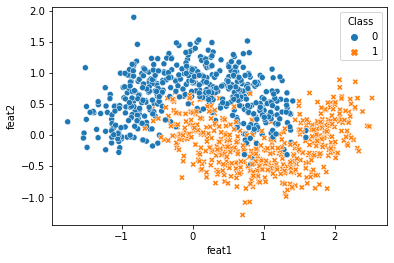

In [149]:
sns.scatterplot(x='feat1',y='feat2',hue='Class',style='Class',data=mdf)

In classification problems we are trying to predict which class an observation belongs to using the features (here, $x$ and $y$ coordinates of the point).

It's pretty clear that there are two distinct classes. 

It's also pretty clear that there is a *nonlinear decision boundary*.

Let's implement logistic regression. We're probably not wildly optimistic about the result since we know that logistic regression fits a linear decision boundary.

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
X=mdf[['feat1','feat2']]
y=mdf['Class']

We should split into train and test sets but we'll cheat for now.

In [152]:
clf = LogisticRegression(random_state=0)

In [153]:
LRclf = clf.fit(X[['feat1','feat2']], y)

After fitting the model (linear in the log odds) we can look at the coeficients:

In [154]:
LRclf.coef_

array([[ 1.16548656, -4.03833483]])

and the intercept:

In [155]:
LRclf.intercept_

array([0.44107692])

And use the fact that the log-odds is 0 when the probability of class 1 is equal to 0.5 to plot the decision boundary:

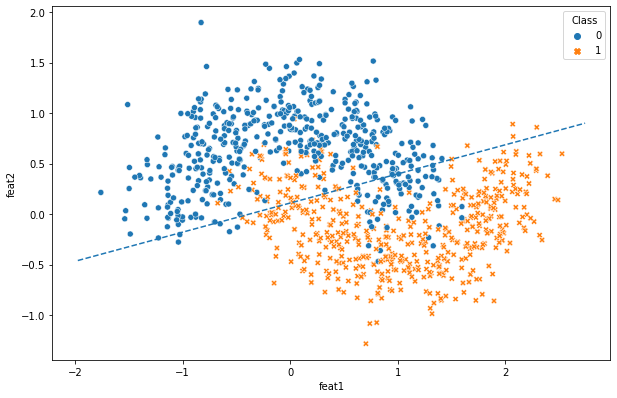

In [156]:
b=LRclf.intercept_
b1,b2=LRclf.coef_[0]

f, ax = plt.subplots(figsize=(10, 6.5))
sns.scatterplot(x="feat1", y="feat2",
                hue="Class", style="Class",
                data=mdf, ax=ax)
x_vals = np.array(ax.get_xlim())
y_vals = -b/b2 - (b1/b2) * x_vals
# b+b1x+b2y = log(odds). When prob(class = 1) is 0.5, we have log(odds)=0. 
#Now solve for y in terms of x to get the decision boundary which is the linear equation above. 
plt.plot(x_vals, y_vals, '--')
plt.show()

In [157]:
x_vals

array([-1.97333511,  2.74236152])

That seems like a pretty good try if we're stuck with a linear boundary.

To get a nonlinear boundary we could try other classification algorithms, or, we could try adding polynomial powers of the features to fit the log-odds better and get more flexible decision boundaries.

This is a little less elegant in sklearn than in statmodels, but we can simply add the higher powers of $x$ and $y$ to the data frame manually.

In [158]:
X['f12']=X['feat1']**2 #feature one squared etc.
X['f22']=X['feat2']**2
X['f13']=X['feat1']**3
X['f23']=X['feat2']**3
X['f14']=X['feat1']**4
X['f24']=X['feat2']**4
X['f15']=X['feat1']**5
X['f25']=X['feat2']**5

We still have the Logistic Regression model defined. We just want to fit various (more flexible) versions of the model and see which one is best using cross validation. 

First split the data:

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

Above we defined: ```clf = LogisticRegression(random_state=0)```

Now, just like we did above for regression, we'll fit various models (including regular logistic regression) and test them on the held-out fold. How to we test a classifier? We'll use the accuracy of the classifier on the test-fold. We'll fit all models up through a full degree 5 model and stick with 5 fold CV here:

In [160]:
lcv1_results = cross_validate(clf, X_train[['feat1','feat2']], y_train, cv=5,scoring='accuracy')
lcv2_results = cross_validate(clf, X_train[['feat1','feat2','f12','f22']], y_train, cv=5,scoring='accuracy')
lcv3_results = cross_validate(clf, X_train[['feat1','feat2','f12','f22','f13','f23']], y_train, cv=5,scoring='accuracy')
lcv4_results = cross_validate(clf, X_train[['feat1','feat2','f12','f22','f13','f23','f14','f24']], y_train, cv=5,scoring='accuracy')
lcv5_results = cross_validate(clf, X_train[['feat1','feat2','f12','f22','f13','f23','f14','f24','f15','f25']], y_train, cv=5,scoring='accuracy')

Let's check out the results:

In [161]:
lcv1_results['test_score'].round(2)

array([0.84, 0.86, 0.86, 0.8 , 0.94])

These are the accuracies on each of the five folds used as a test set for the vanilla logistic regression model. For the degree 1,2,3,4,5 models:

In [162]:
lcv2_results['test_score'].round(2)

array([0.83, 0.86, 0.86, 0.81, 0.94])

In [163]:
lcv3_results['test_score'].round(2)

array([0.94, 0.89, 0.89, 0.93, 0.96])

In [164]:
lcv4_results['test_score'].round(2)

array([0.94, 0.9 , 0.91, 0.93, 0.96])

In [165]:
lcv5_results['test_score'].round(2)

array([0.94, 0.9 , 0.9 , 0.95, 0.95])

We average over the folds and see which one looks best:

In [166]:
print(lcv1_results['test_score'].mean().round(2),lcv2_results['test_score'].mean().round(2),lcv3_results['test_score'].mean().round(2),lcv4_results['test_score'].mean().round(2),lcv5_results['test_score'].mean().round(2))

0.86 0.86 0.92 0.93 0.93


Significant improvement at the degree 3 model, and then very little improvement at degree 4 or 5.

Now, refit on the full training set! Include plain log reg as a comparison:

In [167]:
deg3mod=LogisticRegression(random_state=0).fit(X_train[['feat1','feat2','f12','f22','f13','f23']],y_train)

In [168]:
reglrmod=LogisticRegression(random_state=0).fit(X_train[['feat1','feat2']],y_train)

In [169]:
reglrmod.coef_

array([[ 1.1198082 , -3.86895817]])

In [170]:
deg3mod.coef_

array([[-0.36051588, -4.19363172, -4.51470406, -0.10644762,  3.03486669,
        -1.51789625]])

In [171]:
lrcm=pd.crosstab(LRclf.predict(X_test[['feat1','feat2']]),y_test)
lrcm

Class,0,1
row_0,,
0,127,21
1,15,137


In [172]:
(127+137)/(127+137+21+15)#accuracy for vanilla LogReg

0.88

In [173]:
pd.crosstab(deg3mod.predict(X_test[['feat1','feat2','f12','f22','f13','f23']]),y_test)

Class,0,1
row_0,,
0,133,12
1,9,146


In [174]:
from sklearn.metrics import accuracy_score

In [175]:
#accuracy
accuracy_score(deg3mod.predict(X_test[['feat1','feat2','f12','f22','f13','f23']]),y_test)

0.93

In [176]:
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1.5, 2, 500))
x2=xx**2
y2=yy**2
x3=xx**3
y3=yy**3
X_grid = np.c_[xx.ravel(), yy.ravel(),x2.ravel(),y2.ravel(),x3.ravel(),y3.ravel()]

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


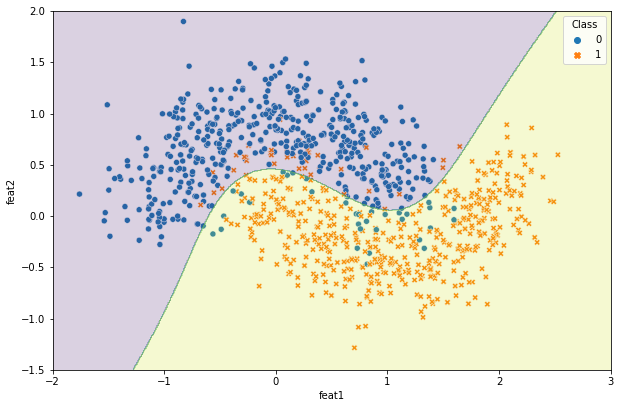

In [177]:
zz_lr3 = deg3mod.predict_proba(X_grid)[:,1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(10, 6.6))
sns.scatterplot(x='feat1',y='feat2',hue='Class',style='Class',data=mdf)
plt.contourf(xx, yy, zz_lr3 > 0.5, alpha=0.2)
plt.show()

## Sandbox

###### Breast cancer data (classification)

In [178]:
from sklearn import datasets
bcd = datasets.load_breast_cancer()
df = pd.DataFrame(bcd['data'], columns=bcd['feature_names'])
df['target'] = bcd['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [179]:
df.shape

(569, 31)

Use available features to predict ```target```. Use cross validation to find a good logistic regression model.

##### Boston Housing (regresison, ridge)

In [180]:
bos=pd.read_csv('Boston.csv')
bos.head()

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [181]:
bos.shape

(506, 21)

Predict ```MEDV``` from available features. Use Ridge and optimize $\lambda$ using cross validation.

###### College basketball data (python, pandas, regression, anything else you want to do!)

In [182]:
cbb=pd.read_csv('cbb20_wUC.csv')
del cbb['Unnamed: 0']

In [183]:
#includes only D1 games in the 2019-2020 season
cbb.head()

,3P,3PA,3PPct,AST,BLK,Date,FG,FGA,FGPct,FT,...,PF,Result,STL,Season,TOV,TRB,Team,TmPts,loc,OppLC
0,8.0,20.0,0.400,12.0,6.0,2019-11-08,25.0,65.0,0.385,13.0,...,24.0,L,10.0,2020,16.0,33.0,arizona-state,71.0,N,colorado
1,7.0,27.0,0.259,19.0,5.0,2019-11-14,29.0,65.0,0.446,25.0,...,18.0,W,14.0,2020,11.0,43.0,arizona-state,90.0,NaN,central-connecticut-state
2,10.0,32.0,0.313,15.0,6.0,2019-11-17,35.0,82.0,0.427,12.0,...,18.0,W,16.0,2020,7.0,39.0,arizona-state,92.0,NaN,rider
3,5.0,19.0,0.263,9.0,4.0,2019-11-23,28.0,61.0,0.459,19.0,...,19.0,W,6.0,2020,13.0,36.0,arizona-state,80.0,N,st-johns-ny
4,5.0,19.0,0.263,7.0,2.0,2019-11-24,17.0,42.0,0.405,6.0,...,13.0,L,8.0,2020,13.0,21.0,arizona-state,45.0,N,virginia


Use ridge regression to predict efficiency (points scored - points allowed) where the predictors are the teams. Use cross validation to optimize lambda and then use the coeficients to rank the teams from best to worst.